# Reflection and transmission from a stack of layers

This notebook follows the prescription of Hecht, "Optics", chapter 9, using 2x2 matrices to solve for transmission and reflection off a stack of lossless optical components of different indices.  This is, for example, relevant to the frequency-dependent performance of anti-reflection coatings.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Make inline plots in this notebook, make them reasonable sizes, and with legible font size
%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 8]

# Set physical constants
c = 3.0e8    # m/s
e0 = 8.85e-12
u0 = 4*np.pi*1e-7
n0 = 1.000   # in vacuum
epsmu = e0*u0
Y0 = epsmu

Define the system we want to analyze.
In this example we'll do two layers of black poly separated by a space.

In [25]:
#  Properties of system
n_silicon = 3.4
n_AR  = np.sqrt(n_silicon)


t = 0.002/4/n_AR   # 1/4 wave ar coat at 2mm

# Set thicknesses of each layer
#
n_set = np.array([n_AR, n_silicon, n_AR])
dvec =  np.array([t, 0.01, t])                   # thicknesses of the three layers

n_layers = len(dvec)

Y_set = n_set*epsmu


Calculate transmission and reflection as a function of frequency.

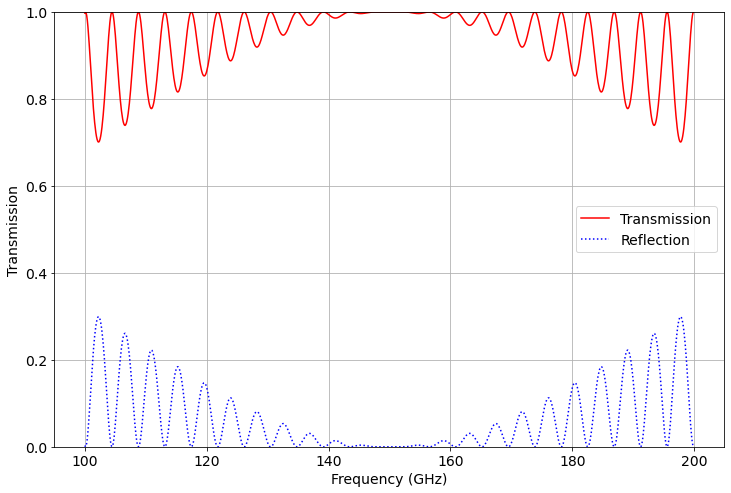

In [27]:
nu_vec_ghz = np.arange(100,200,0.1)

Refl_diffsum = 0

Refl_vec = np.array([])
Trans_vec = np.array([])

# loop over frequencies
for nu_ghz in nu_vec_ghz:
    nu = nu_ghz*1.0e9   # nu is in Hz
    
    #  Set k*h for each layer and axis
    factor1 = 2*np.pi*(nu/c)
    
    M_tot = np.eye(2)   # create 2x2 identity matrix to start.
   
    #  loop over all the layers, accumulating the matrix product
    for layer in np.arange(n_layers):
        
        kh = n_set[layer]*dvec[layer]*factor1

        # Define M matrix for this layer, then multiply it by ones to the
        # right...
        A = np.cos(kh)
        B = np.sin(kh)
        M = np.array([[    A,                 1j*B/Y_set[layer] ],
                      [ 1j*Y_set[layer]*B,      A               ]])
        
        M_tot = np.matmul(M,M_tot)    
    
    # Find the reflection coefficient
    r = (Y0*M_tot[0, 0] + Y0*Y0*M_tot[0, 1] - M_tot[1, 0] - Y0*M_tot[1, 1]) / \
        (Y0*M_tot[0, 0] + Y0*Y0*M_tot[0, 1] + M_tot[1, 0] + Y0*M_tot[1, 1])

    R = np.abs(r)**2
    Refl_vec  = np.append(Refl_vec, R)
    Trans_vec = np.append(Trans_vec,1-R)
    


# Plot results
plt.figure()
plt.clf()

plt.plot(nu_vec_ghz,Trans_vec,'-r',label='Transmission')
plt.plot(nu_vec_ghz,Refl_vec,':b',label='Reflection')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Transmission')
plt.legend()
plt.ylim(0,1)
plt.grid()